In [ ]:
# ! pip install tqdm

In [33]:
from torchvision.datasets import ImageFolder
from torchvision import utils, transforms

import pandas as pd
from tqdm import tqdm

import os

from dotenv import load_dotenv

In [ ]:
PATH_TO_DOT_ENV = "../src/.env"

# load environment variables from the .env file
load_dotenv(PATH_TO_DOT_ENV)

APTOS_2019_FILE_EXTENSION = os.environ.get("APTOS_2019_FILE_EXTENSION")

PROCESSED_DATASET_DIR = ".." + os.environ.get("PROCESSED_DATASET_DIR")
TRAIN_DATASET_ROOT_DIR = PROCESSED_DATASET_DIR + os.environ.get("PROCESSED_DATASET_TRAIN_DIR")
BALANCED_TRAIN_DATASET_ROOT_DIR = PROCESSED_DATASET_DIR + os.environ.get("PROCESSED_DATASET_TRAIN_BALANCED_DIR")

BALALCED_DATASET_INCREASE = int(os.environ.get("BALALCED_DATASET_INCREASE"))

BATCH_SIZE = int(os.environ.get("BATCH_SIZE"))
NUM_WORKERS = int(os.environ.get("NUM_WORKERS"))

In [ ]:
data_transforms = transforms.Compose([
        transforms.RandomRotation(degrees=(0, 90)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ColorJitter(brightness=.05, hue=.05),
        transforms.Resize(size=(360,360)),
        transforms.ToTensor(),
])

In [ ]:
train_dataset = ImageFolder(
    root = TRAIN_DATASET_ROOT_DIR,
)

<Axes: xlabel='0'>

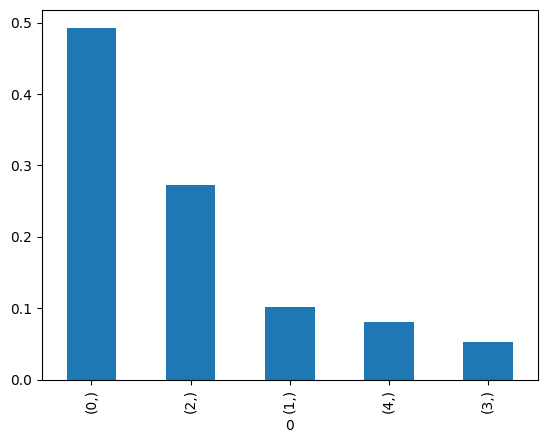

In [ ]:
labels_df = pd.DataFrame(train_dataset.targets)

lable_percentages = labels_df.value_counts() / len(labels_df) 
lable_percentages.plot.bar()


In [ ]:
increament_df = (BALALCED_DATASET_INCREASE / lable_percentages).round()
increament_df

0
0     4.0
2     7.0
1    20.0
4    25.0
3    38.0
Name: count, dtype: float64

In [ ]:
for lable in train_dataset.classes:
    os.makedirs(f"{BALANCED_TRAIN_DATASET_ROOT_DIR}{lable}", exist_ok=True)

In [37]:
progress_bar = tqdm(train_dataset)
for image_index, (image, lable) in enumerate(progress_bar):
    for transform_index in range(int(increament_df[lable])):
        file_name = f"{BALANCED_TRAIN_DATASET_ROOT_DIR}{lable}/{image_index:02}_{transform_index:03}{APTOS_2019_FILE_EXTENSION}"
        transformed_image = data_transforms(image)
        
        progress_bar.set_postfix_str(file_name)
        
        utils.save_image(transformed_image, file_name)

100%|██████████| 2929/2929 [2:03:04<00:00,  2.52s/it, ../data/processed/train_balanced/4/2928_024.png]  


In [38]:
balanced_train_dataset = ImageFolder(
    root = BALANCED_TRAIN_DATASET_ROOT_DIR,
    transform=data_transforms,
)

In [47]:
for _class in balanced_train_dataset.classes:
    image_count = len(os.listdir(f"{BALANCED_TRAIN_DATASET_ROOT_DIR}{_class}"))
    print(f"Class {_class}: {image_count}")

Class 0: 5776
Class 1: 5920
Class 2: 5593
Class 3: 5852
Class 4: 5900
